#### Importing necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

#### Load the dataset 

In [104]:
data = pd.read_csv('train_exit.csv')

In [3]:
data # have a look at the data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


### EDA

In [4]:
# understanding number of rows and columns
data.shape

(13994, 30)

In [6]:
# data columns basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [7]:
# check for statistical info
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [10]:
# Visualizations
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

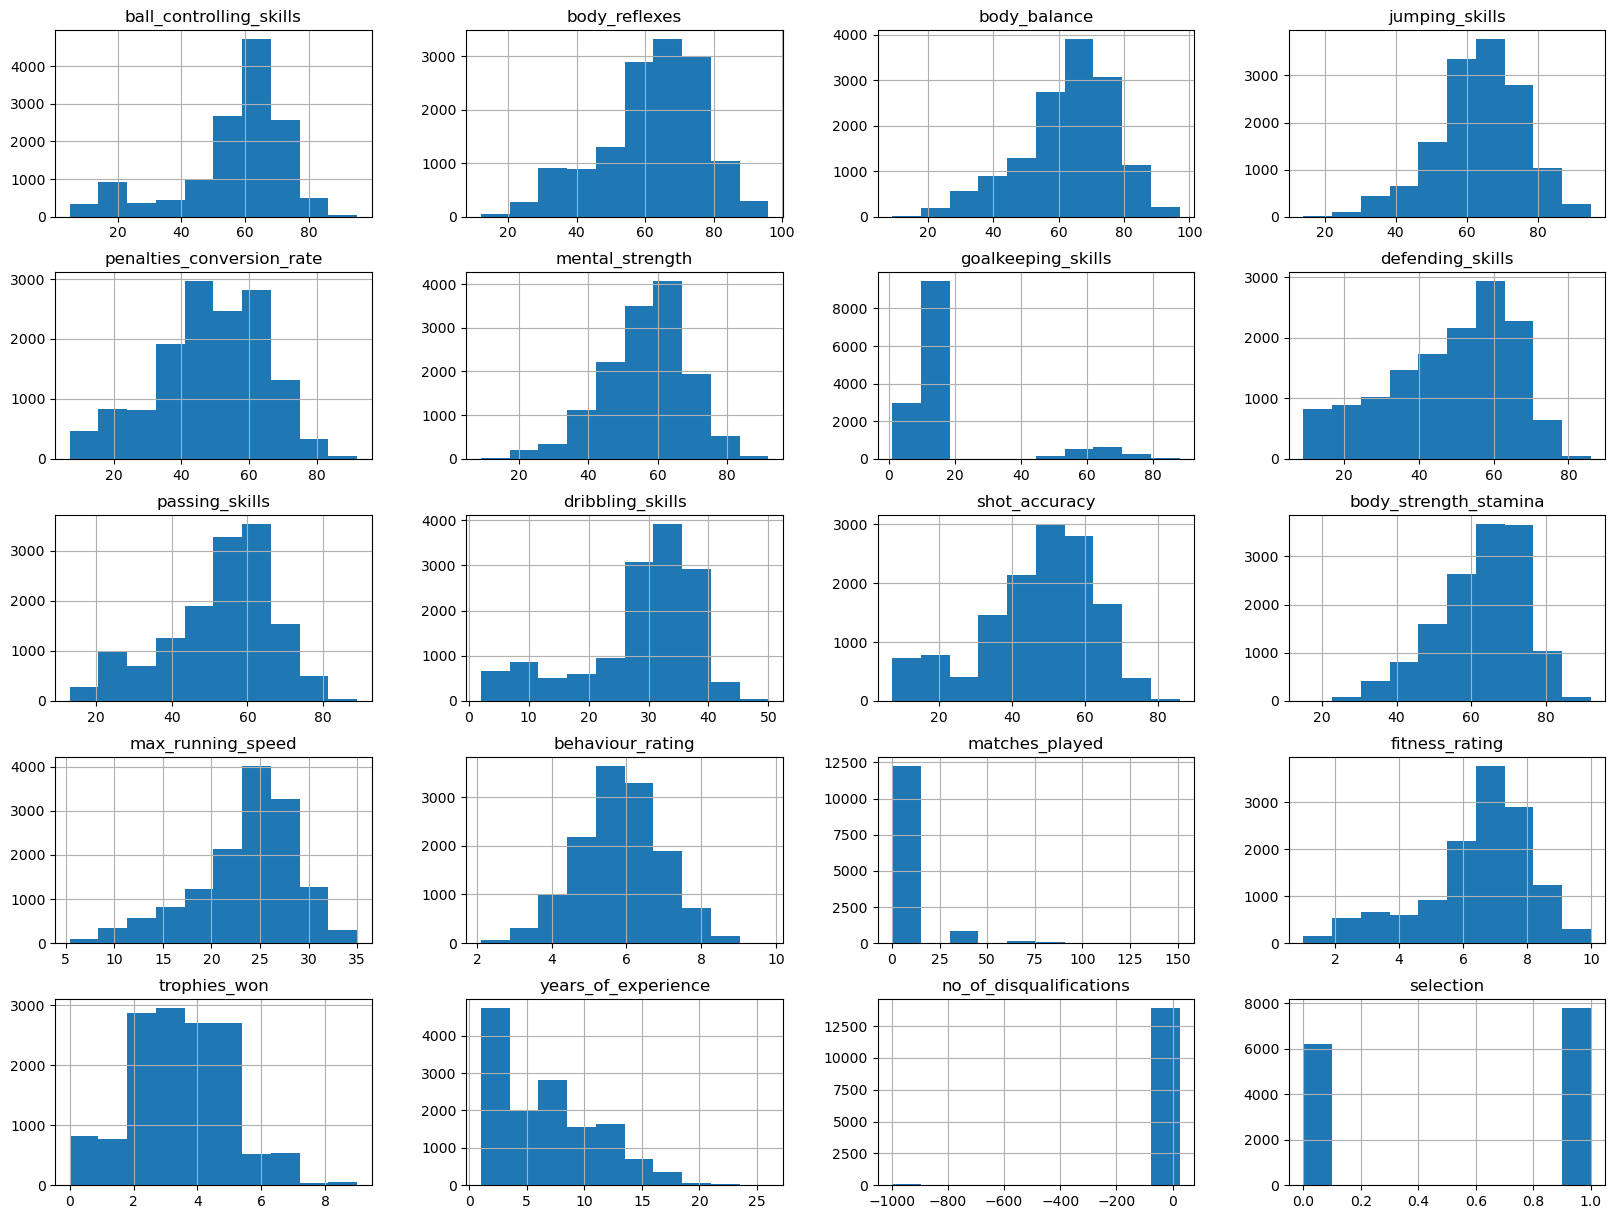

In [14]:
col = data[[
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications',
       'selection']]
col.hist(figsize=(20,15))
plt.show()

mainly all features are normally distributed

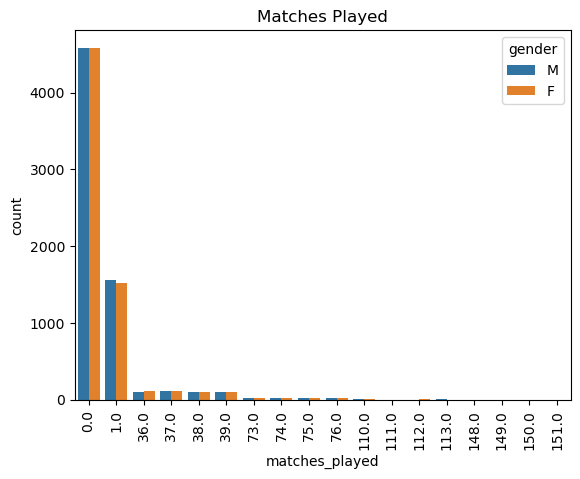

In [19]:
#count plot
sns.countplot(x='matches_played',data=data,hue = 'gender')
plt.title('Matches Played')
plt.xticks(rotation=90)
plt.show()

both genders are equal in no of matches

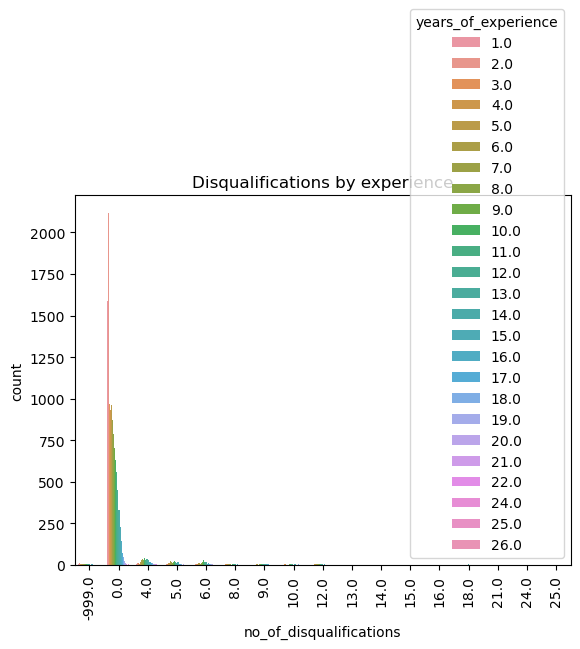

In [20]:
#no of disqualifications based on experience
sns.countplot(x='no_of_disqualifications',data=data, hue = 'years_of_experience')
plt.title('Disqualifications by experience')
plt.xticks(rotation=90)
plt.show()

disqualifications are very low for players recorded

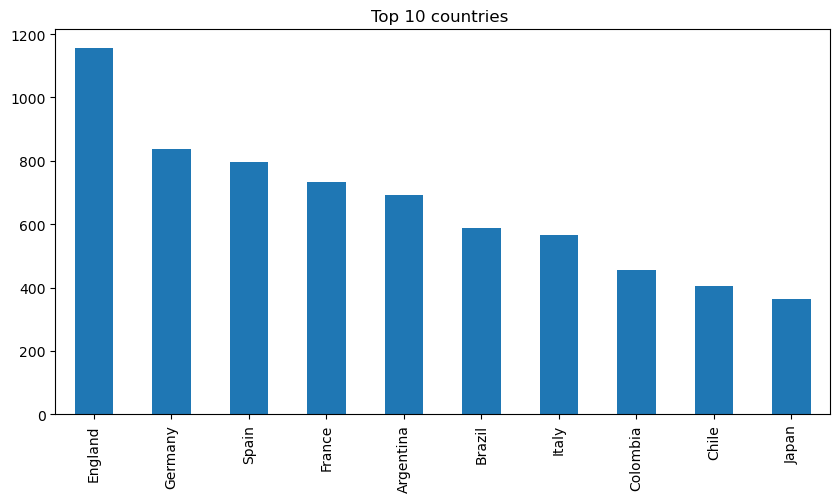

In [106]:
#strong_foot_category = data[(data['strong_foot'] == 'Right')]
#Top 10 countries according to
data['country'].value_counts().nlargest(10).plot.bar(data['trophies_won'],figsize=(10,5), 
                                                                title=('Top 10 countries '))
                                                        
plt.show()

##### Top 10 countries according to the trophies won

C:\Users\user\AppData\Local\Temp\ipykernel_16020\1694248136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="coolwarm")


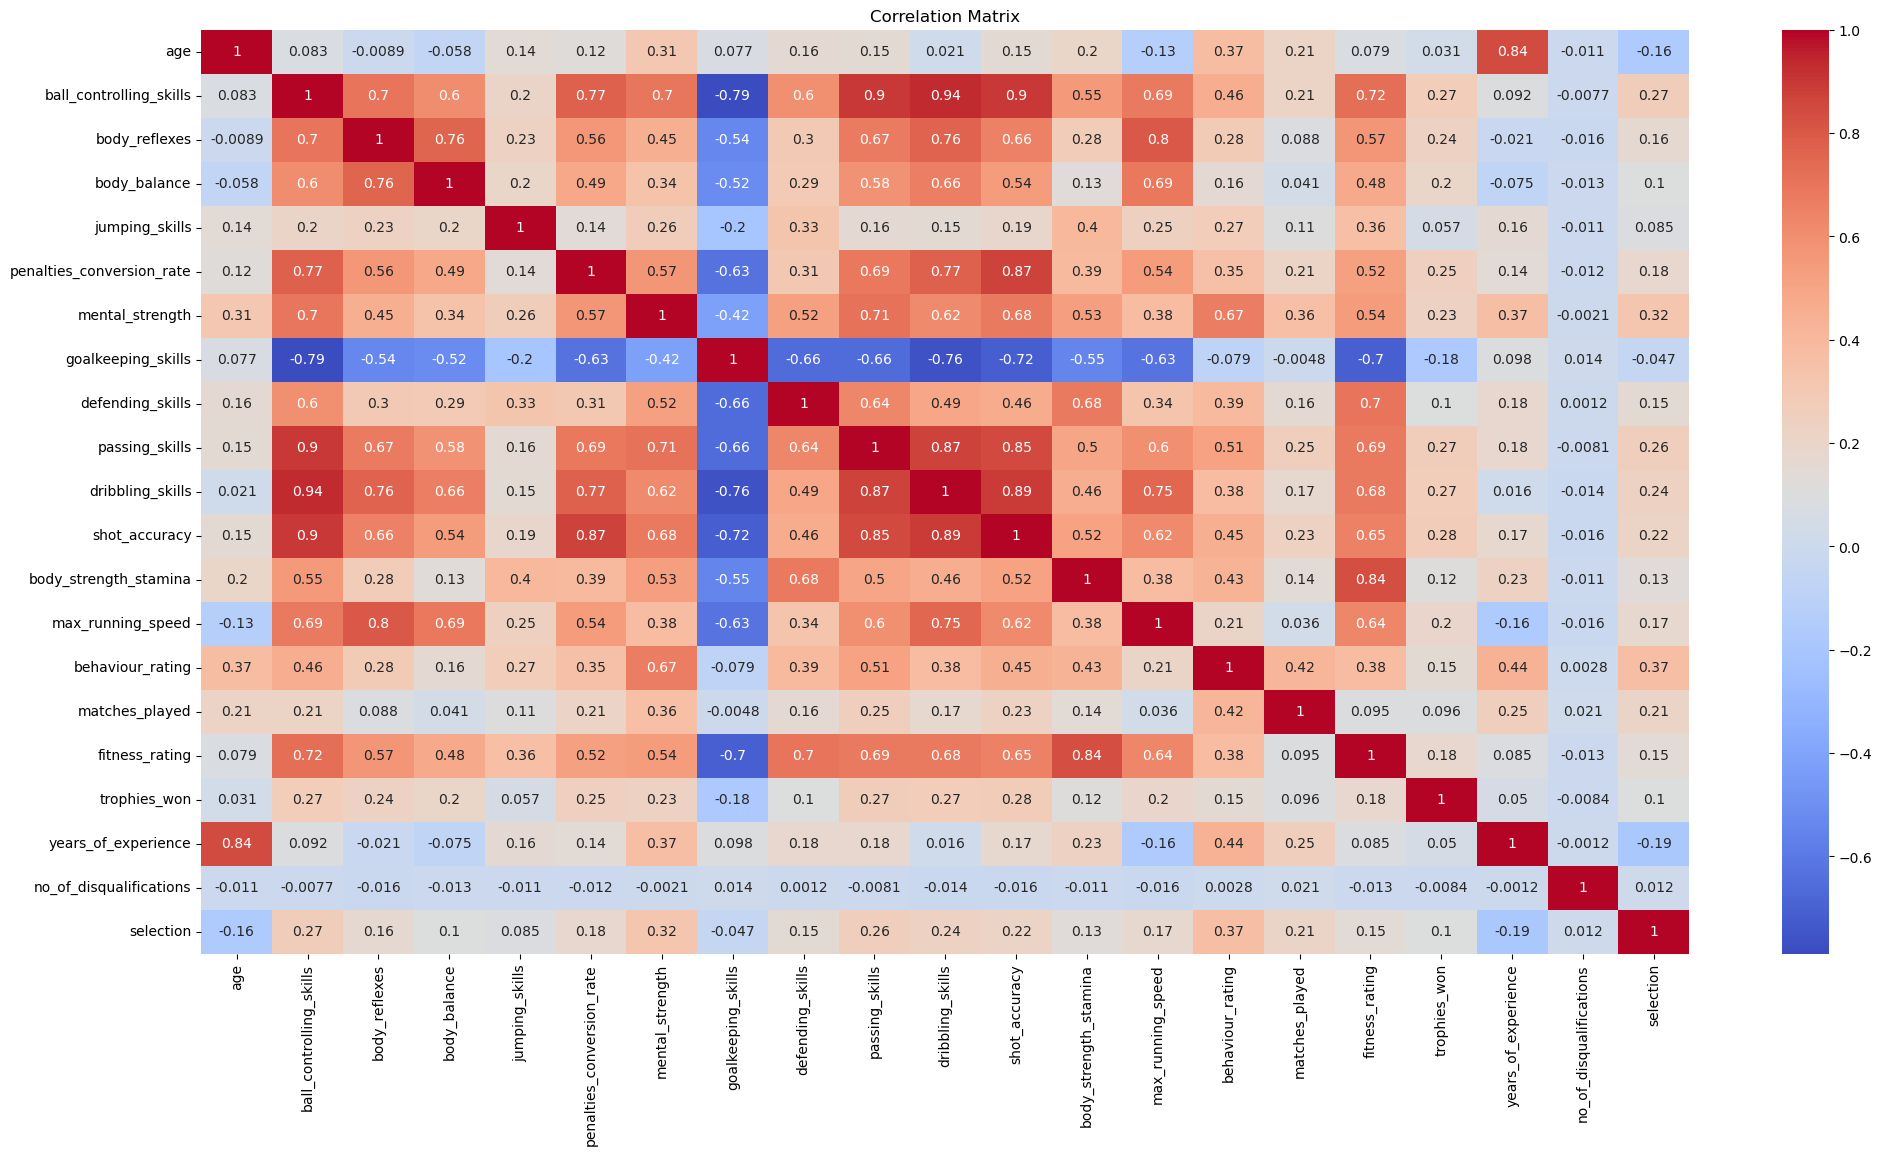

In [33]:
# Heat map
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### PRE PROCESSING

In [32]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [28]:
# CHECK FOR NULL VALUES
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

#### Feature engineering

In [51]:
# remove lbs unit from weight column
data['weight'] = data['weight'].str.replace('lbs', '')

In [52]:
# convert to numeric
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

In [53]:
# convert height to centimetres
def convert_height_to_cm(height):
    feet, inches = map(int, height.split("'"))
    cm_height = (feet * 30.48) + (inches * 2.54)
    return cm_height

In [54]:
data['height'] = data['height'].apply(convert_height_to_cm)

In [55]:
# convert to numeric
data['height'] = pd.to_numeric(data['height'], errors='coerce')

#### Filling missing values

In [56]:
# Since there are null values in many columns, they needs to be filled.
# Since mainly all features have normal distribution, missing values in numerical columns are filled using median.
col = ['weight','ball_controlling_skills','jumping_skills','penalties_conversion_rate','mental_strength',
       'shot_accuracy','behaviour_rating','matches_played','fitness_rating','years_of_experience']
for i in col:
    data[i] = data[i].fillna(data[i].median())

In [57]:
# Filling missing values in object columns
obj_col = ['gender','strong_foot','coaching']
for i in obj_col:
    data[i].fillna(method='bfill', inplace= True)

In [58]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

#### Outlier detection

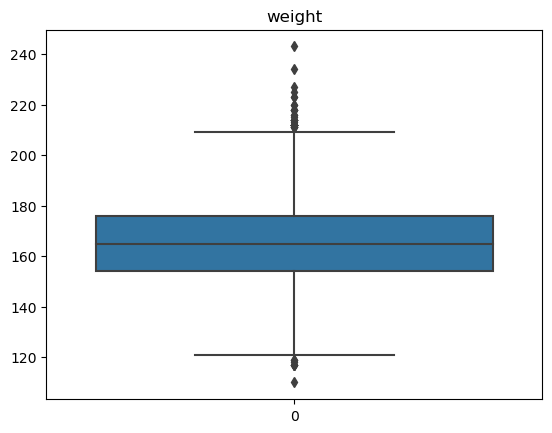

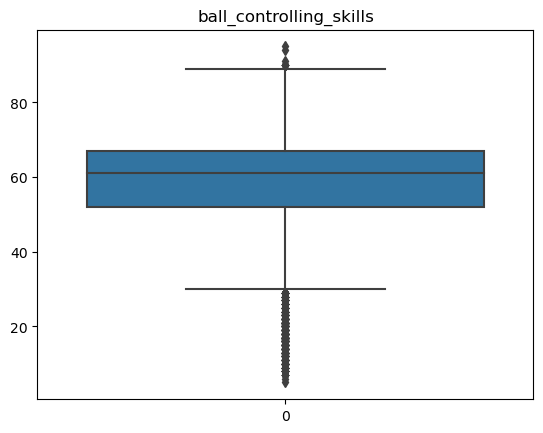

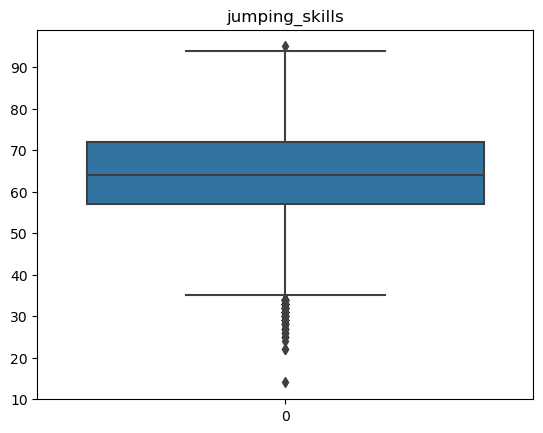

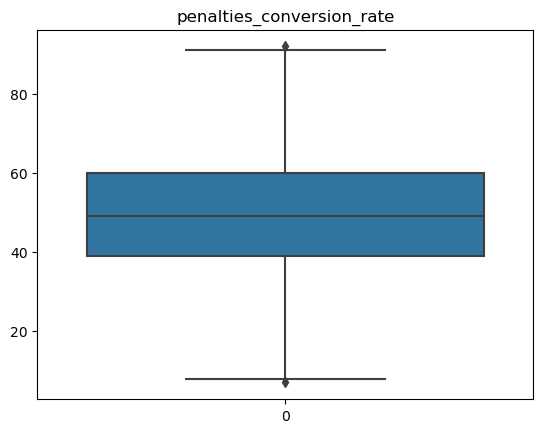

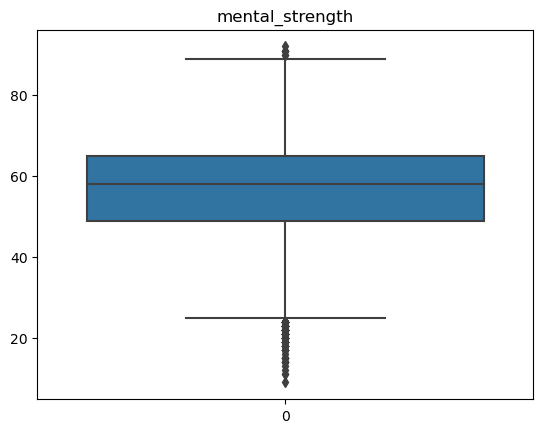

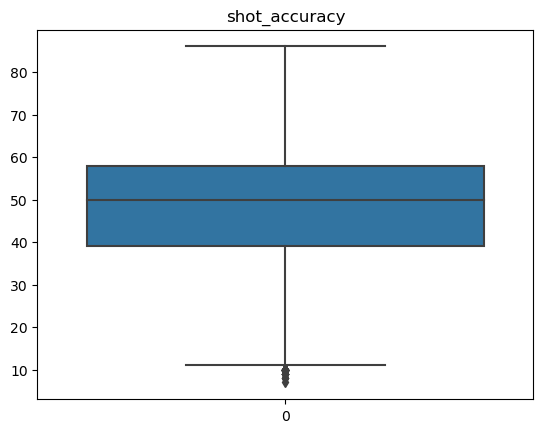

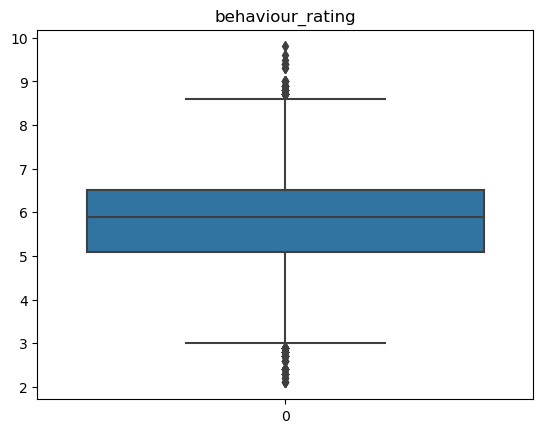

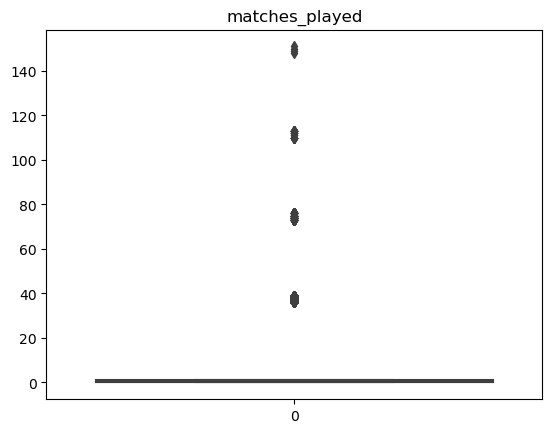

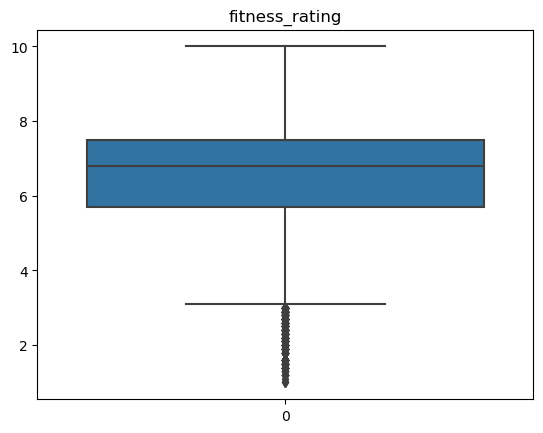

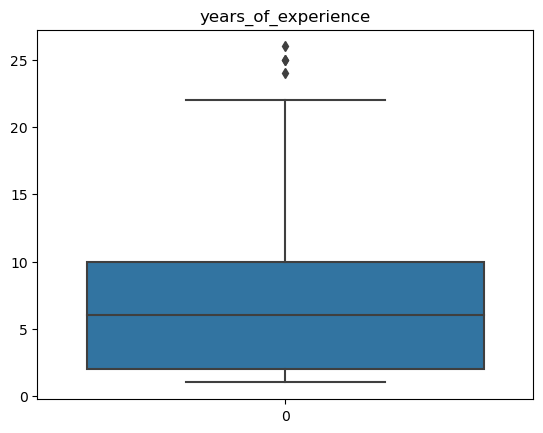

In [60]:
# boxplots
cols = ['height', 'weight', 'age'
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
        'years_of_experience', 'no_of_disqualifications']
for i in col:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

A pattern a lot of outliers are found in all boxplots except ' matches_played' and 'years_of_experience', So find these outliers

In [64]:
# outliers are present only above upper limit

Q3 = np.percentile(data['matches_played'],75,method = 'midpoint')
IQR = Q3-Q1
up_lim = Q3 +1.5*IQR
outlier1 =[]
for x in data ["matches_played"]:
    if(x>up_lim):
        outlier1.append(x)

outlier1

[113.0,
 39.0,
 38.0,
 75.0,
 37.0,
 36.0,
 37.0,
 39.0,
 39.0,
 37.0,
 39.0,
 38.0,
 37.0,
 39.0,
 38.0,
 36.0,
 39.0,
 39.0,
 39.0,
 36.0,
 39.0,
 36.0,
 37.0,
 38.0,
 37.0,
 39.0,
 76.0,
 36.0,
 38.0,
 38.0,
 38.0,
 39.0,
 39.0,
 37.0,
 39.0,
 75.0,
 39.0,
 37.0,
 38.0,
 37.0,
 74.0,
 39.0,
 75.0,
 73.0,
 38.0,
 36.0,
 75.0,
 73.0,
 76.0,
 39.0,
 38.0,
 76.0,
 150.0,
 39.0,
 76.0,
 38.0,
 37.0,
 39.0,
 39.0,
 74.0,
 113.0,
 36.0,
 38.0,
 37.0,
 74.0,
 38.0,
 76.0,
 39.0,
 75.0,
 37.0,
 74.0,
 37.0,
 36.0,
 75.0,
 74.0,
 39.0,
 38.0,
 37.0,
 37.0,
 39.0,
 39.0,
 75.0,
 39.0,
 39.0,
 36.0,
 76.0,
 73.0,
 76.0,
 39.0,
 76.0,
 38.0,
 39.0,
 36.0,
 39.0,
 73.0,
 75.0,
 39.0,
 39.0,
 39.0,
 37.0,
 38.0,
 39.0,
 74.0,
 37.0,
 37.0,
 39.0,
 37.0,
 74.0,
 39.0,
 38.0,
 36.0,
 36.0,
 39.0,
 38.0,
 36.0,
 38.0,
 39.0,
 76.0,
 39.0,
 38.0,
 38.0,
 37.0,
 38.0,
 36.0,
 38.0,
 74.0,
 37.0,
 37.0,
 36.0,
 38.0,
 74.0,
 76.0,
 36.0,
 112.0,
 37.0,
 36.0,
 39.0,
 112.0,
 37.0,
 36.0,
 37.0,
 38.0,
 

In [65]:
# set outliers to up_lim
data['matches_played'] = np.where(data['matches_played'] > up_lim, up_lim, data['matches_played'])

In [66]:
# years_of_experience
# outliers are present only above upper limit

Q3 = np.percentile(data['years_of_experience'],75,method = 'midpoint')
IQR = Q3-Q1
up_lim = Q3 +1.5*IQR
outlier2 =[]
for x in data ["years_of_experience"]:
    if(x>up_lim):
        outlier2.append(x)

outlier2

[26.0]

In [67]:
# set outliers to up_lim
data['years_of_experience'] = np.where(data['years_of_experience'] > up_lim, up_lim, data['years_of_experience'])

#### Feature selection

In [68]:
# Some irrelevant columns to prediction are dropped
data=data.drop(['name','player_id'],axis=1)

In [69]:
data.columns

Index(['age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [70]:
# From the corelation matrix,any one among some of the highly corelated pair of features,or with very low corelation  can be dropped.
# some of them identified were 
data=data.drop(['dribbling_skills','fitness_rating','max_running_speed','no_of_disqualifications'],axis=1)

In [73]:
#Columns that would go to modeling phase
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  float64
 4   weight                     13994 non-null  float64
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

#### Encoding

In [84]:
# label encoding features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
to_encode = ['gender','country','strong_foot','coaching','dedication_level']
for i in to_encode:
    data[i]=le.fit_transform(data[i])

### MODELING


In [85]:
y = data['selection']
x = data.drop(['selection'],axis = 1)

In [86]:
#Splitting the data in such a way that 80% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

#### Logistic regression

In [87]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

C:\Users\user\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
lr_pred=lr_model.predict(x_test)

In [89]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)

Accuracy score : 0.7595569846373705


#### DECISION TREE

In [90]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [91]:
#Predicting the output for the test data using the fitted model
y_pred_dt=dt_model.predict(x_test)

In [92]:
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)

Accuracy score : 0.7792068595927116


#### RANDOM FOREST

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [94]:
#Predicting the output for the test data using the fitted model
y_pred_rf=model_rf.predict(x_test)

In [95]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)

Accuracy score : 0.8524473026080743


#### EXTRA TREES CLASSIFIER

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
xt_cls=ExtraTreesClassifier()
xt_model=xt_cls.fit(x_train,y_train)

In [97]:
y_pred_xt=xt_model.predict(x_test)

In [98]:
xt_acc=accuracy_score(y_test,y_pred_xt)
print("Accuracy score :",xt_acc)

Accuracy score : 0.8435155412647374


#### PARAMETER TUNING ON RANDOM FOREST

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_cls, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the RandomForestClassifier with the best hyperparameters
best_rf_cls = RandomForestClassifier(**best_params)
best_rf_cls.fit(x_train, y_train)

# Evaluate the model
accuracy = best_rf_cls.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.8535191139692747


### Parameter tuning has slightly improved accuracy of hyper tuned random forest model